<a href="https://colab.research.google.com/github/pradeep-0918/SCT_-ML_03/blob/main/Task_3_support_vector_machine_(svm)_to_classify_image_of_cat_and_dog_ML_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import cv2
import os
from google.colab import files
import zipfile

In [3]:
print("Please upload your kaggle.json file")
uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d biaiscience/dogs-vs-cats
with zipfile.ZipFile('dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')


print("Verifying dataset structure:")
print(os.listdir('dataset'))

if os.path.exists('dataset/train/train'):
    print(os.listdir('dataset/train/train'))
else:
    print("Error: 'dataset/train/train' directory not found!")



Please upload your kaggle.json file


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 98% 799M/817M [00:07<00:00, 184MB/s]
100% 817M/817M [00:07<00:00, 120MB/s]
Verifying dataset structure:
['train', 'test']
['cat.7136.jpg', 'dog.5675.jpg', 'cat.8463.jpg', 'cat.11990.jpg', 'cat.4554.jpg', 'dog.9221.jpg', 'dog.6207.jpg', 'dog.8993.jpg', 'dog.11739.jpg', 'cat.1372.jpg', 'cat.6331.jpg', 'dog.666.jpg', 'cat.7085.jpg', 'dog.4482.jpg', 'dog.10104.jpg', 'dog.10955.jpg', 'cat.9595.jpg', 'dog.12303.jpg', 'cat.6473.jpg', 'cat.11992.jpg', 'cat.5942.jpg', 'cat.339.jpg', 'dog.3026.jpg', 'cat.2309.jpg', 'dog.4381.jpg', 'dog.7550.jpg', 'dog.1772.jpg', 'cat.6944.jpg', 'cat.9148.jpg', 'cat.2861.jpg', 'dog.11795.jpg', 'cat.1638.jpg', 'dog.1285.jpg', 'cat.10755.jpg', 'cat.7325.jpg', 'cat.5347.jpg', 'cat.1960.jpg', 'cat.7595.jpg', 'cat.5763.jpg', 'dog.2408.jpg', 'cat.8762.jpg', 'cat.2229.jpg', 'cat.12112.jpg', 'dog.5691.jpg', 'cat.419.jpg', 'cat.6164.jpg', 'cat.

In [4]:
def load_and_preprocess_images(directory, num_images=None):
    images = []
    labels = []
    cat_count = 0
    dog_count = 0

    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} not found!")

    print(f"Scanning directory: {directory}")
    for filename in os.listdir(directory):

        if not filename.endswith(('.jpg', '.jpeg', '.png')) or filename.startswith('.'):
            continue

        if num_images is not None and cat_count >= num_images//2 and dog_count >= num_images//2:
            break

        if filename.startswith('cat') and (num_images is None or cat_count < num_images//2):
            img_path = os.path.join(directory, filename)
            try:
                if os.path.exists(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        img = img.flatten()
                        images.append(img)
                        labels.append(0)
                        cat_count += 1
                    else:
                        print(f"Failed to load image: {img_path}")
                else:
                    print(f"File not found: {img_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

        elif filename.startswith('dog') and (num_images is None or dog_count < num_images//2):
            img_path = os.path.join(directory, filename)
            try:
                if os.path.exists(img_path):
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, (64, 64))
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                        img = img.flatten()
                        images.append(img)
                        labels.append(1)
                        dog_count += 1
                    else:
                        print(f"Failed to load image: {img_path}")
                else:
                    print(f"File not found: {img_path}")
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

    print(f"Loaded {len(images)} images: {cat_count} cats, {dog_count} dogs")
    if len(images) == 0:
        raise ValueError(f"No images loaded from directory {directory}. Check file paths and contents.")

    return np.array(images), np.array(labels)


print("Loading and preprocessing images...")
try:
    X, y = load_and_preprocess_images('dataset/train/train', num_images=1000)
except Exception as e:
    print(f"Error loading images: {str(e)}")
    raise

Loading and preprocessing images...
Scanning directory: dataset/train/train
Loaded 1000 images: 500 cats, 500 dogs


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

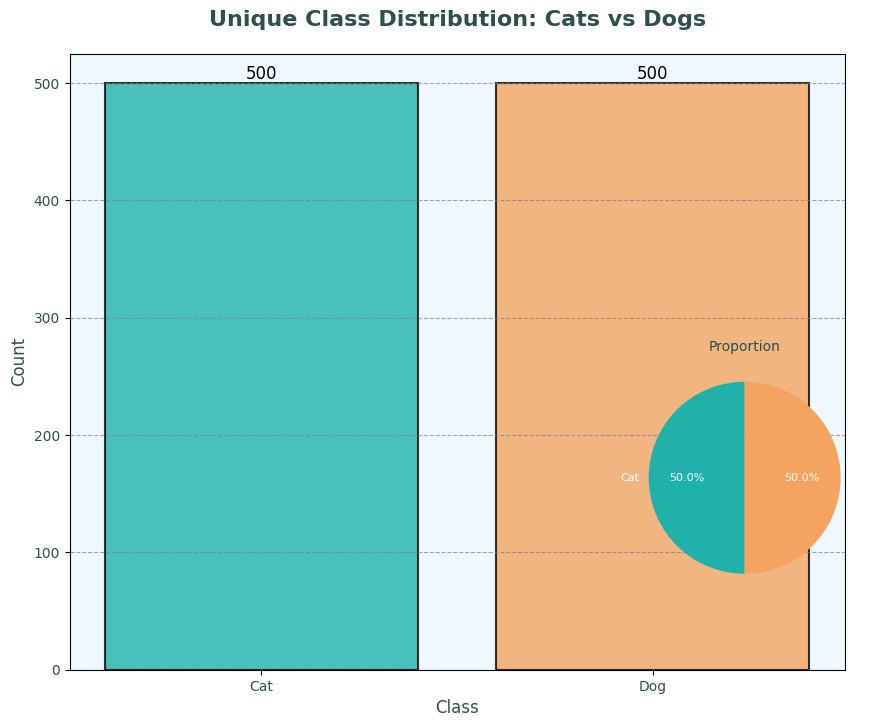

In [7]:

plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#f0f8ff')

custom_colors = ['#20b2aa', '#f4a460', '#40e0d0', '#d4a017']

bars = plt.bar(['Cat', 'Dog'], [np.sum(y == 0), np.sum(y == 1)], color=custom_colors, edgecolor='black', linewidth=1.5)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=12, color='black')


plt.title('Unique Class Distribution: Cats vs Dogs', fontsize=16, fontweight='bold', pad=20, color='#2f4f4f')
plt.xlabel('Class', fontsize=12, color='#2f4f4f')
plt.ylabel('Count', fontsize=12, color='#2f4f4f')


plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')


plt.xticks(fontsize=10, color='#2f4f4f')
plt.yticks(fontsize=10, color='#2f4f4f')


for bar in bars:
    bar.set_alpha(0.8)

plt.axes([0.65, 0.2, 0.3, 0.3])
plt.pie([np.sum(y == 0), np.sum(y == 1)], labels=['Cat', 'Dog'], colors=custom_colors[:2],
        startangle=90, autopct='%1.1f%%', textprops={'fontsize': 8, 'color': 'white'})
plt.title('Proportion', fontsize=10, color='#2f4f4f', pad=5)

plt.show()

In [8]:
print("Training SVM model...")
svm_classifier = svm.SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

Training SVM model...


SVC(random_state=42)

In [11]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))

Accuracy: 55.50%

Classification Report:
              precision    recall  f1-score   support

         Cat       0.50      0.58      0.53        88
         Dog       0.62      0.54      0.57       112

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.55       200
weighted avg       0.56      0.56      0.56       200



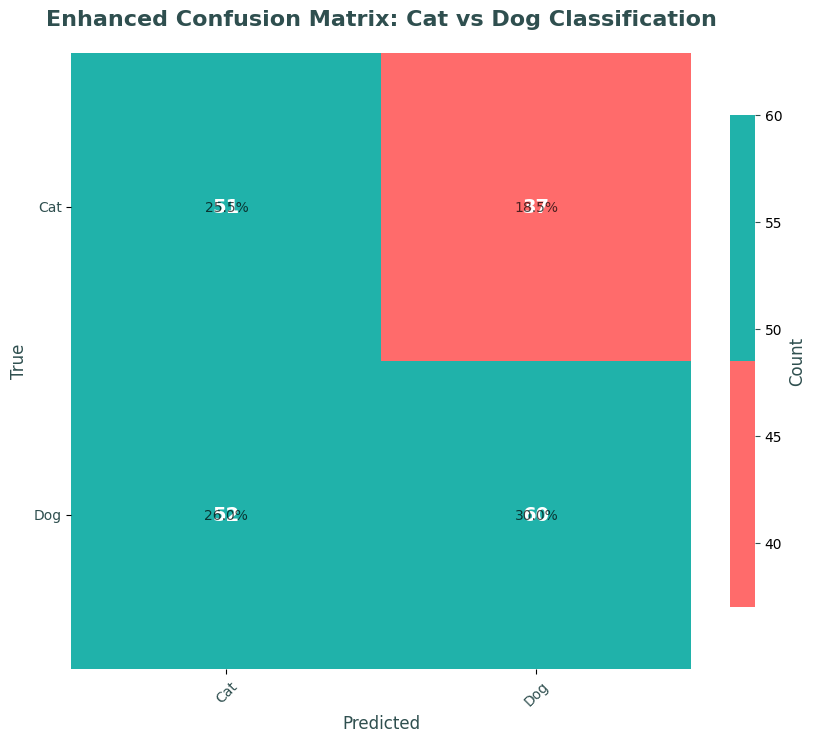

In [13]:

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
plt.gca().set_facecolor('#f0f8ff')


custom_colors = sns.color_palette(['#ff6b6b', '#20b2aa'])

heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap=custom_colors,
                      xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'],
                      annot_kws={'size': 14, 'weight': 'bold', 'color': 'white'},
                      cbar_kws={'label': 'Count', 'shrink': .8})


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        total = cm.sum()
        percentage = (cm[i, j] / total) * 100
        heatmap.text(j + 0.5, i + 0.5, f'{percentage:.1f}%',
                     ha='center', va='center', color='black', fontsize=10, alpha=0.7)


plt.title('Enhanced Confusion Matrix: Cat vs Dog Classification', fontsize=16, fontweight='bold', pad=20, color='#2f4f4f')
plt.xlabel('Predicted', fontsize=12, color='#2f4f4f')
plt.ylabel('True', fontsize=12, color='#2f4f4f')

plt.xticks(fontsize=10, color='#2f4f4f', rotation=45)
plt.yticks(fontsize=10, color='#2f4f4f', rotation=0)


plt.gca().set_frame_on(True)
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['right'].set_color('gray')


cbar = heatmap.collections[0].colorbar
cbar.set_label('Count', size=12, color='#2f4f4f')
cbar.ax.tick_params(labelsize=10, color='#2f4f4f')

plt.show()

Sample predictions (10 examples):


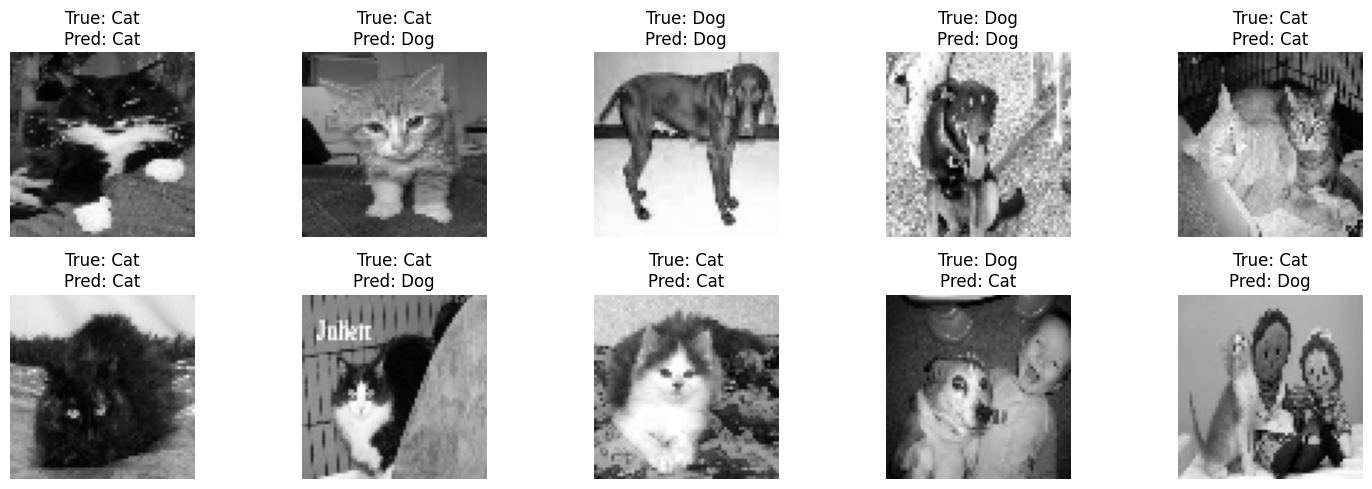

In [15]:
def plot_sample_predictions(X_test, y_test, y_pred, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_samples, len(X_test))):
        plt.subplot(2, 5, i+1)
        # Reshape the flattened image back to 64x64
        img = X_test[i].reshape(64, 64)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {['Cat','Dog'][y_test[i]]}\nPred: {['Cat','Dog'][y_pred[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
print("Sample predictions (10 examples):")
plot_sample_predictions(X_test, y_test, y_pred, num_samples=10)

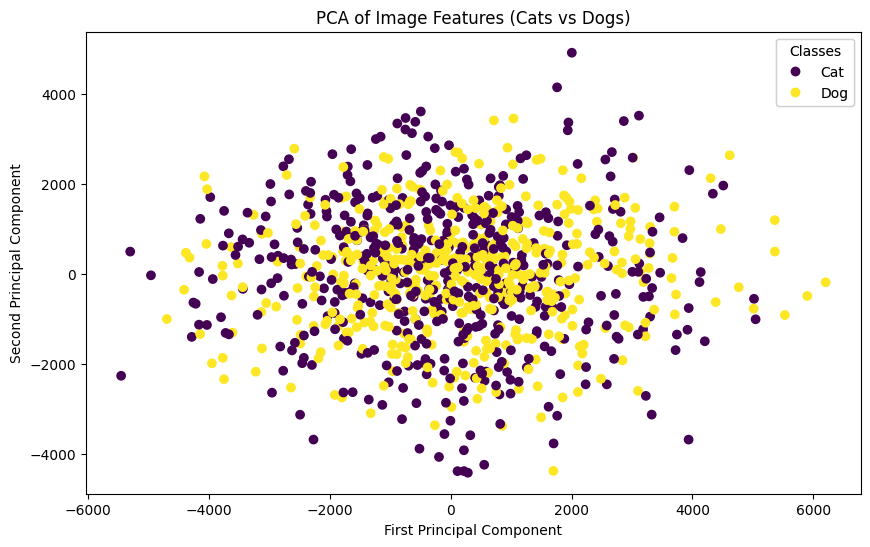

Explained variance ratio by PCA components: [0.19998428 0.1187962 ]


In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Image Features (Cats vs Dogs)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
legend1 = plt.legend(handles=scatter.legend_elements()[0], labels=['Cat', 'Dog'], title="Classes")
plt.gca().add_artist(legend1)
plt.show()
print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_}")

In [25]:
train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X_train, y_train, cv=5, n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

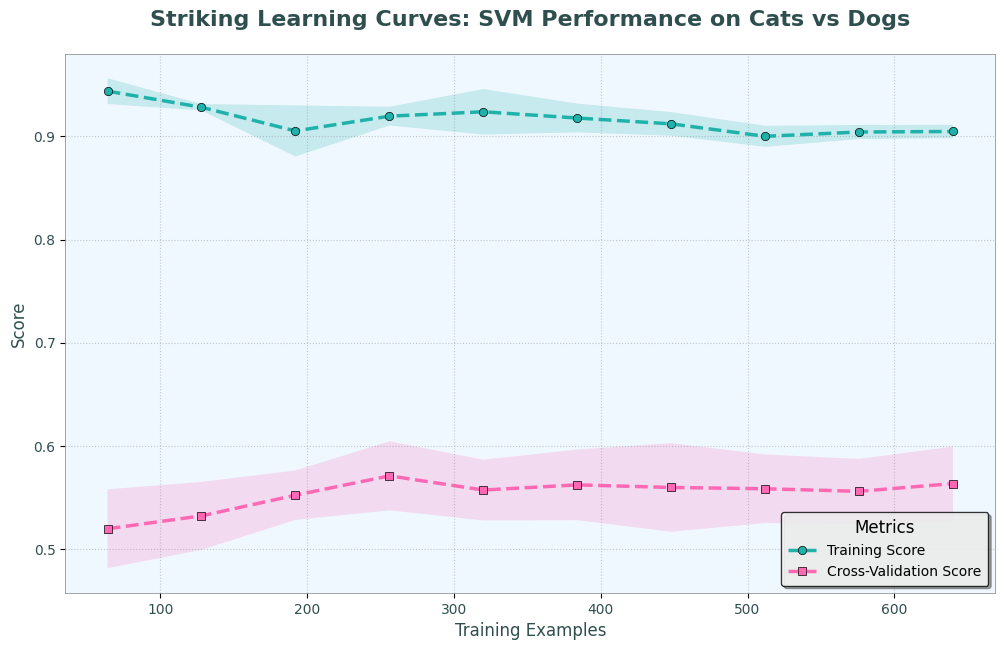

In [27]:
plt.figure(figsize=(12, 7))
plt.gca().set_facecolor('#f0f8ff')


custom_colors = ['#20b2aa', '#ff69b4']

plt.plot(train_sizes, train_mean, label='Training Score', color=custom_colors[0],
         linestyle='--', linewidth=2.5, marker='o', markersize=6, markeredgecolor='black', markeredgewidth=0.5)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color=custom_colors[1],
         linestyle='--', linewidth=2.5, marker='s', markersize=6, markeredgecolor='black', markeredgewidth=0.5)


plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                 color=custom_colors[0], alpha=0.2, edgecolor='none')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                 color=custom_colors[1], alpha=0.2, edgecolor='none')


plt.title('Striking Learning Curves: SVM Performance on Cats vs Dogs', fontsize=16, fontweight='bold', pad=20, color='#2f4f4f')
plt.xlabel('Training Examples', fontsize=12, color='#2f4f4f')
plt.ylabel('Score', fontsize=12, color='#2f4f4f')

plt.grid(True, linestyle=':', alpha=0.4, color='gray', zorder=0)


plt.xticks(fontsize=10, color='#2f4f4f')
plt.yticks(fontsize=10, color='#2f4f4f')


plt.legend(loc='lower right', fontsize=10, title='Metrics', title_fontsize=12,
           frameon=True, facecolor='white', edgecolor='black', framealpha=0.8,
           shadow=True, borderpad=0.5)


plt.gca().spines['top'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

plt.show()